In [411]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import math

In [412]:
from datetime import datetime,date, timedelta

### Q1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [413]:
claims = pd.read_csv("C:\\Users\\maclu\\Downloads\\Data Science with Python (Foundation) –Assignments and Case Studies\\5. Pandas Case Study 3 - Insurance Claims Case Study\\5. Pandas Case Study 3 - Insurance Claims Case Study\\claims.csv")
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [414]:
claims.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
dtype: int64

In [415]:
demo=pd.read_csv("C:\\Users\\maclu\\Downloads\\Data Science with Python (Foundation) –Assignments and Case Studies\\5. Pandas Case Study 3 - Insurance Claims Case Study\\5. Pandas Case Study 3 - Insurance Claims Case Study\\cust_demographics.csv")
demo.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [416]:
demo.isnull().sum()

CUST_ID        0
gender         0
DateOfBirth    0
State          0
Contact        0
Segment        0
dtype: int64

In [417]:
comb_df = pd.merge(right = claims,
                   left = demo, 
                   right_on = "customer_id", 
                   left_on = "CUST_ID",
                   how = "inner"
                  )
#comb_df.drop(columns = ["customer_id"], inplace = True)
comb_df

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
5,47830476,Female,01-May-86,MA,413-187-7945,Silver,91609100,47830476,Natural causes,04/12/2017,Auto,Unknown,Material only,$1440,1.0,No
6,19269962,Male,13-May-77,NV,956-871-8691,Gold,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
7,19269962,Male,13-May-77,NV,956-871-8691,Gold,39219616,19269962,Other causes,09/26/2018,Auto,No,Material only,$2240,2.0,No
8,21831191,Male,17-May-77,NH,419-712-8513,Gold,24050443,21831191,Other driver error,10/04/2017,Auto,No,Injury only,$38306.5,3.0,Yes
9,21831191,Male,17-May-77,NH,419-712-8513,Gold,91475471,21831191,Driver error,02/09/2018,Auto,Unknown,Material and injury,$36810,1.0,No


In [418]:
comb_df.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [419]:
comb_df.isnull().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
dtype: int64

In [420]:
comb_df.duplicated().sum()

0

In [421]:
print(claims.shape)
print(demo.shape)
print(comb_df.shape)

(1100, 10)
(1085, 6)
(1085, 16)


### Q2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance

In [422]:
#Data Audit
d=comb_df.dtypes[comb_df.dtypes!='object'].index.values
comb_df[d]=comb_df[d].astype('float64')
mean=DataFrame({'mean':comb_df[d].mean()})
std_dev=DataFrame({'std_dev':comb_df[d].std()})
missing= DataFrame({'missing':comb_df[d].isnull().sum()})
minimum=DataFrame({'min':comb_df[d].min()})
maximum=DataFrame({'max':comb_df[d].max()})
DA=pd.concat([mean,std_dev,missing,minimum,maximum],axis=1,sort = False)

c=comb_df.dtypes[comb_df.dtypes=='object'].index.values
Mean=DataFrame({'mean':np.repeat('Not Applicable',len(c))},index=c)
Std_Dev=DataFrame({'std_dev':np.repeat('Not Applicable',len(c))},index=c)
Missing=DataFrame({'missing':comb_df[c].isnull().sum()})
Minimum=DataFrame({'min':np.repeat('Not Applicable',len(c))},index=c)
Maximum=DataFrame({'max':np.repeat('Not Applicable',len(c))},index=c)
Da=pd.concat([Mean,Std_Dev,Missing,Minimum,Maximum],axis =1,sort = False)
Dq = pd.concat([DA,Da])

In [423]:
Dq.to_csv('DataAudit.csv')

In [424]:
dq = pd.read_csv("DataAudit.csv")
dq.rename(columns = {'Unnamed: 0':''})

,,mean,std_dev,missing,min,max
0,CUST_ID,50767904.341935486,28496245.372373052,0,154557.0,99961993.0
1,claim_id,48915528.40092166,29128181.617819,0,26832.0,99775483.0
2,customer_id,50767904.341935486,28496245.372373052,0,154557.0,99961993.0
3,total_policy_claims,1.5869767441860465,1.1468593964606506,10,1.0,8.0
4,gender,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable
5,DateOfBirth,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable
6,State,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable
7,Contact,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable
8,Segment,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable
9,incident_cause,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable


### Q3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [425]:
comb_df['claim_amount'] = comb_df['claim_amount'].str.replace('$', '')
comb_df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,1680,1.0,No


In [426]:
comb_df['claim_amount']= comb_df['claim_amount'].astype(float)

In [427]:
comb_df["Contact"] = comb_df.Contact.str.replace("-","")
comb_df

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,7899168172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No
1,75740424.0,Female,13-Jan-70,ME,2655431264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No
2,30308357.0,Female,11-Mar-84,TN,7986314758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,7986314758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No
4,47830476.0,Female,01-May-86,MA,4131877945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No
5,47830476.0,Female,01-May-86,MA,4131877945,Silver,91609100.0,47830476.0,Natural causes,04/12/2017,Auto,Unknown,Material only,1440.0,1.0,No
6,19269962.0,Male,13-May-77,NV,9568718691,Gold,22890252.0,19269962.0,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No
7,19269962.0,Male,13-May-77,NV,9568718691,Gold,39219616.0,19269962.0,Other causes,09/26/2018,Auto,No,Material only,2240.0,2.0,No
8,21831191.0,Male,17-May-77,NH,4197128513,Gold,24050443.0,21831191.0,Other driver error,10/04/2017,Auto,No,Injury only,38306.5,3.0,Yes
9,21831191.0,Male,17-May-77,NH,4197128513,Gold,91475471.0,21831191.0,Driver error,02/09/2018,Auto,Unknown,Material and injury,36810.0,1.0,No


In [428]:
comb_df.dtypes

CUST_ID                float64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id               float64
customer_id            float64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount           float64
total_policy_claims    float64
fraudulent              object
dtype: object

### Q4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims

In [429]:
Injury_claims=comb_df.loc[(comb_df.claim_type=="Injury only")]
Injury_claims

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
8,21831191.0,Male,17-May-77,NH,4197128513,Gold,24050443.0,21831191.0,Other driver error,10/04/2017,Auto,No,Injury only,38306.5,3.0,Yes
18,18288638.0,Female,14-Jan-69,MI,3141351359,Platinum,67257404.0,18288638.0,Other driver error,04/24/2018,Auto,Yes,Injury only,32560.0,1.0,No
21,63916778.0,Male,07-Sep-66,IL,1461574572,Platinum,7809917.0,63916778.0,Other causes,07/22/2017,Auto,No,Injury only,17800.0,1.0,No
22,17004138.0,Female,13-Aug-65,WA,4363544682,Silver,29205389.0,17004138.0,Natural causes,06/25/2017,Auto,No,Injury only,31380.0,1.0,No
23,9667764.0,Female,10-Oct-79,SC,6439788251,Platinum,19051665.0,9667764.0,Other causes,12/17/2017,Auto,Yes,Injury only,36190.0,1.0,No
27,35597589.0,Female,17-Feb-80,IN,8267313964,Gold,68848682.0,35597589.0,Other driver error,05/29/2017,Auto,Yes,Injury only,16830.0,1.0,No
33,80379865.0,Male,27-Feb-69,NM,4275138479,Gold,18210740.0,80379865.0,Natural causes,02/09/2018,Auto,No,Injury only,18580.0,NaN,No
41,27205554.0,Male,12-Apr-76,RI,5219128139,Silver,13167216.0,27205554.0,Driver error,05/14/2018,Auto,No,Injury only,16910.0,1.0,No
47,54642094.0,Male,10-Aug-95,NY,9638131973,Silver,3673097.0,54642094.0,Driver error,04/12/2017,Auto,No,Injury only,19960.0,1.0,No
48,47091036.0,Male,22-Oct-86,SD,2474368713,Gold,58245818.0,47091036.0,Driver error,07/27/2018,Home,No,Injury only,27230.0,1.0,No


In [430]:
ts=Injury_claims.police_report
Injury_claims["Alert Flag"] = np.where((ts == "No"),0,1)
Injury_claims.head()

C:\Users\maclu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Alert Flag
8,21831191.0,Male,17-May-77,NH,4197128513,Gold,24050443.0,21831191.0,Other driver error,10/04/2017,Auto,No,Injury only,38306.5,3.0,Yes,0
18,18288638.0,Female,14-Jan-69,MI,3141351359,Platinum,67257404.0,18288638.0,Other driver error,04/24/2018,Auto,Yes,Injury only,32560.0,1.0,No,1
21,63916778.0,Male,07-Sep-66,IL,1461574572,Platinum,7809917.0,63916778.0,Other causes,07/22/2017,Auto,No,Injury only,17800.0,1.0,No,0
22,17004138.0,Female,13-Aug-65,WA,4363544682,Silver,29205389.0,17004138.0,Natural causes,06/25/2017,Auto,No,Injury only,31380.0,1.0,No,0
23,9667764.0,Female,10-Oct-79,SC,6439788251,Platinum,19051665.0,9667764.0,Other causes,12/17/2017,Auto,Yes,Injury only,36190.0,1.0,No,1


### Q5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.
### Retain the most recent observation and delete any duplicated records in the data based on the customer ID column

In [431]:
comb_df.claim_date = pd.to_datetime(comb_df.claim_date, format = '%m/%d/%Y')
comb_df.DateOfBirth = pd.to_datetime(comb_df.DateOfBirth, format = '%d-%b-%y')
comb_df.groupby(by=["CUST_ID"])
Duplicate_treat = comb_df.sort_values(by = ["claim_date"],ascending=False)
Duplicate_treat = comb_df.drop(columns=['customer_id'])
Duplicate_treat = comb_df

In [432]:
Duplicate_treat = comb_df.drop_duplicates(subset=["CUST_ID"])
Duplicate_treat = comb_df
comb_df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,1979-01-12,VT,7899168172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424.0,Female,1970-01-13,ME,2655431264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357.0,Female,1984-03-11,TN,7986314758,Silver,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357.0,Female,1984-03-11,TN,7986314758,Silver,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476.0,Female,1986-05-01,MA,4131877945,Silver,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No


### Q6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [433]:
nmiss = comb_df.shape[0] - comb_df.count()
nmiss.loc[(nmiss != 0)]
nmiss

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
dtype: int64

In [434]:
comb_df.claim_amount = comb_df.claim_amount.fillna(comb_df.claim_amount.mean())
comb_df.total_policy_claims = comb_df.total_policy_claims.fillna(comb_df.total_policy_claims.mean())
comb_df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,1979-01-12,VT,7899168172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424.0,Female,1970-01-13,ME,2655431264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357.0,Female,1984-03-11,TN,7986314758,Silver,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357.0,Female,1984-03-11,TN,7986314758,Silver,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476.0,Female,1986-05-01,MA,4131877945,Silver,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No


### Q7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
##### Children < 18
##### Youth 18-30
##### Adult 30-60
##### Senior > 60

In [435]:
import datetime as dt
now = datetime.now()    
comb_df['age'] = ((now - comb_df['DateOfBirth'])/365).dt.days
comb_df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,age
0,21868593.0,Female,1979-01-12,VT,7899168172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,41
1,75740424.0,Female,1970-01-13,ME,2655431264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,50
2,30308357.0,Female,1984-03-11,TN,7986314758,Silver,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,36
3,30308357.0,Female,1984-03-11,TN,7986314758,Silver,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,36
4,47830476.0,Female,1986-05-01,MA,4131877945,Silver,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,34


In [436]:
ts=comb_df.age
comb_df["Category"] = np.where((ts < 18),"Children",np.where((ts>=18)&(ts<30),"Youth",np.where((ts>=30)&(ts<60),"Adult","Senior")))
comb_df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,age,Category
0,21868593.0,Female,1979-01-12,VT,7899168172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,41,Adult
1,75740424.0,Female,1970-01-13,ME,2655431264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,50,Adult
2,30308357.0,Female,1984-03-11,TN,7986314758,Silver,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,36,Adult
3,30308357.0,Female,1984-03-11,TN,7986314758,Silver,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,36,Adult
4,47830476.0,Female,1986-05-01,MA,4131877945,Silver,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,34,Adult


### Q8. What is the average amount claimed by the customers from various segments?

In [437]:
a = comb_df.groupby(by=["CUST_ID","Segment"])[["claim_amount"]].mean().add_prefix("Average_")
a.head()

,,Average_claim_amount
CUST_ID,Segment,
154557.0,Platinum,12467.681373
263204.0,Silver,39192.000000
287476.0,Silver,1621.500000
441097.0,Gold,37040.000000
524545.0,Gold,35250.000000


### Q9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [438]:
date_object = datetime.strptime('01-October-18', '%d-%B-%y')
dt = date_object - timedelta(20)
print('Given Date :',date_object)
print('20 days before Current Date :',dt)

Given Date : 2018-10-01 00:00:00
20 days before Current Date : 2018-09-11 00:00:00


In [439]:
b = comb_df.loc[(comb_df.claim_date<dt)]
b.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,age,Category
0,21868593.0,Female,1979-01-12,VT,7899168172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,41,Adult
2,30308357.0,Female,1984-03-11,TN,7986314758,Silver,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,36,Adult
3,30308357.0,Female,1984-03-11,TN,7986314758,Silver,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,36,Adult
4,47830476.0,Female,1986-05-01,MA,4131877945,Silver,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,34,Adult
5,47830476.0,Female,1986-05-01,MA,4131877945,Silver,91609100.0,47830476.0,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,34,Adult


In [440]:
b1 = b.groupby(by=["incident_cause","claim_type"])[["claim_amount"]].sum().add_prefix("TOtal_")
b1

TOtal_claim_amount
incident_cause     claim_type                             
Crime              Injury only                3.063085e+05
                   Material and injury        2.038275e+05
                   Material only              2.143124e+05
Driver error       Injury only                1.173608e+06
                   Material and injury        1.789380e+06
                   Material only              3.569645e+05
Natural causes     Injury only                4.117022e+05
                   Material and injury        5.550432e+05
                   Material only              3.473753e+05
Other causes       Injury only                1.511945e+06
                   Material and injury        1.820021e+06
                   Material only              3.930195e+05
Other driver error Injury only                1.323087e+06
                   Material and injury        1.689544e+06
                   Material only              3.061381e+05

### Q10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes

In [441]:
c = comb_df.loc[(comb_df.State=="TX")|(comb_df.State=="DE")|(comb_df.State=="AK")]
c1 = c.loc[(c.Category=="Adult")]
c2 = c1.loc[(c1.incident_cause=="Driver error")|(c1.incident_cause=="Other driver error")]
c2.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,age,Category
101,2632562.0,Female,1985-12-14,AK,4985979658,Platinum,4506676.0,2632562.0,Other driver error,2018-05-14,Home,Unknown,Material only,1400.000000,1.0,No,35,Adult
103,92752865.0,Male,1986-01-30,AK,1432195498,Silver,82144259.0,92752865.0,Driver error,2017-04-25,Auto,No,Injury only,12467.681373,1.0,No,34,Adult
118,61810954.0,Male,1969-05-18,TX,7244936179,Silver,65335959.0,61810954.0,Other driver error,2018-09-19,Auto,Unknown,Material and injury,36620.000000,1.0,No,51,Adult
147,3159546.0,Male,1987-10-20,TX,5861299752,Platinum,26716331.0,3159546.0,Other driver error,2017-04-25,Auto,No,Injury only,17590.000000,4.0,No,33,Adult
187,68772500.0,Male,1989-11-10,TX,5622595432,Silver,21550521.0,68772500.0,Driver error,2018-08-30,Auto,Unknown,Material only,2320.000000,1.0,No,31,Adult


In [442]:
c3 = c2.claim_id.count()
print("Total count of Adults",c3)

Total count of Adults 23


### Q11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [443]:
d = comb_df.groupby(by=["gender","Segment"])[["claim_amount"]].sum().add_prefix("Total_")
d

Total_claim_amount
gender Segment                     
Female Gold            2.109738e+06
       Platinum        2.369484e+06
       Silver          1.901912e+06
Male   Gold            2.701374e+06
       Platinum        2.098303e+06
       Silver          2.346624e+06

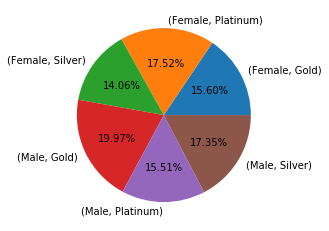

In [444]:
d.plot(kind="pie",subplots=True,legend=False,autopct="%0.2f%%")
plt.ylabel("")
plt.show()

### Q12.  Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [445]:
f = comb_df.loc[(comb_df.incident_cause=="Driver error")|(comb_df.incident_cause=="Other driver error")]
f1 = f.groupby(by=["gender"])[["incident_cause"]].count().add_prefix("Total_")
f1

,Total_incident_cause
gender,
Female,222
Male,284


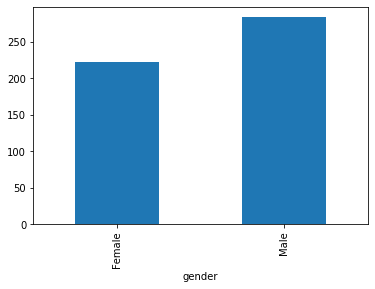

In [446]:
f1.plot(kind="bar",legend=False)
plt.show()

Male has claimed More.

### Q13.  Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [447]:
g = comb_df.loc[(comb_df.fraudulent=="Yes")]
g.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,age,Category
2,30308357.0,Female,1984-03-11,TN,7986314758,Silver,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,36,Adult
8,21831191.0,Male,1977-05-17,NH,4197128513,Gold,24050443.0,21831191.0,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,43,Adult
13,33507197.0,Female,2066-09-09,RI,1655194583,Gold,63246959.0,33507197.0,Crime,2017-07-22,Auto,No,Material only,2748.5,2.0,Yes,-46,Children
14,99103685.0,Female,1985-12-30,KY,7644399856,Gold,74165873.0,99103685.0,Other driver error,2018-01-13,Home,No,Material only,1495.0,1.0,Yes,34,Adult
20,1407979.0,Male,1987-03-15,RI,1652171648,Silver,12548447.0,1407979.0,Driver error,2018-06-03,Auto,Unknown,Material only,3208.5,1.0,Yes,33,Adult


In [448]:
g1 = g.groupby(by=["Category"])[["total_policy_claims"]].count().add_prefix("Total_")
g1

,Total_total_policy_claims
Category,
Adult,137
Children,60
Youth,50


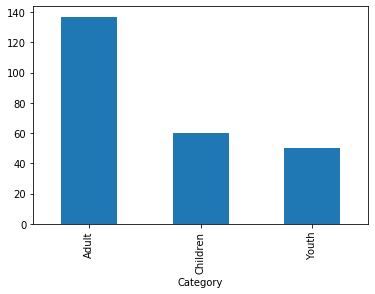

In [449]:
g1.plot(kind="bar",legend=False)
plt.show()

Adults has more

### Q14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [450]:
comb_df['month'] = pd.DatetimeIndex(comb_df['claim_date']).month
h = comb_df

In [451]:
h1 = h.groupby(by=["month"])[["claim_amount"]].sum().add_prefix("Total_").reset_index()
h1.head()

,month,Total_claim_amount
0,1,1.331992e+06
1,2,1.169906e+06
2,3,1.320080e+06
3,4,1.293886e+06
4,5,1.114189e+06


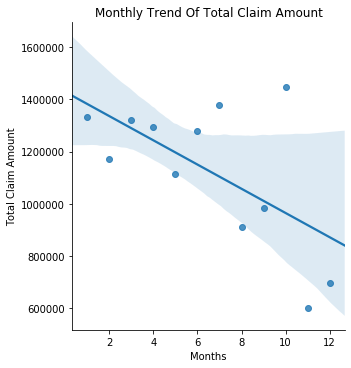

In [452]:
sns.lmplot(x="month",y="Total_claim_amount",data=h1,fit_reg=True)
plt.xlabel("Months")
plt.ylabel("Total Claim Amount")
plt.title("Monthly Trend Of Total Claim Amount")
plt.show()

### Q15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims

In [453]:
i = comb_df.groupby(by=["gender","age","fraudulent"])[["claim_amount"]].mean().add_prefix("Average_").reset_index()
i.head()

,gender,age,fraudulent,Average_claim_amount
0,Female,-49,Yes,3139.500000
1,Female,-48,No,15376.666667
2,Female,-48,Yes,1357.000000
3,Female,-47,No,6379.768137
4,Female,-47,Yes,16468.000000


In [454]:
import plotly.express as px
fig = px.bar(i, x="age", y="Average_claim_amount", color="gender", facet_row="fraudulent")
fig.show()

### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements

### Q16. Is there any similarity in the amount claimed by males and females?

In [455]:
comb_df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,age,Category,month
0,21868593.0,Female,1979-01-12,VT,7899168172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,41,Adult,11
1,75740424.0,Female,1970-01-13,ME,2655431264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,50,Adult,10
2,30308357.0,Female,1984-03-11,TN,7986314758,Silver,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,36,Adult,2
3,30308357.0,Female,1984-03-11,TN,7986314758,Silver,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,36,Adult,4
4,47830476.0,Female,1986-05-01,MA,4131877945,Silver,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,34,Adult,6


In [456]:
Males_claims = comb_df.claim_amount.loc[(comb_df.gender=="Male")]
Females_claims = comb_df.claim_amount.loc[(comb_df.gender=="Female")]

H0: NULL Hypothesis : mean claim amount of Males = mean claim amount of females H1: Alternate Hypothesis : mean claim amount of Males != mean claim amount of females Confidence interval is 95% Test : 2 Sample independent t-test

In [457]:
uneq_var=stats.ttest_ind(a=Males_claims,b=Females_claims,equal_var=False)
uneq_var

Ttest_indResult(statistic=0.9746136200857317, pvalue=0.3299696522030814)

In [458]:
eq_var=stats.ttest_ind(a=Males_claims,b=Females_claims,equal_var=True)
eq_var

Ttest_indResult(statistic=0.9738138415066818, pvalue=0.33036643165116597)

In [459]:
t_score=uneq_var.statistic - eq_var.statistic
t_score

0.0007997785790498924

 We'll cosider equal variance since the t score is not having a huge difference.

With 95% confidence interval,pvalue(0.33) is greater than 1-significance level(0.05) so we accept the null

In [460]:
Males_claims.mean()

12853.058506136278

In [461]:
Females_claims.mean()

12062.634706623674

In [462]:
stats.f_oneway(s1, s2)

F_onewayResult(statistic=1.6142815365063252, pvalue=0.20424360994427096)

Mean values shows that male claims and female claims not have such difference

#### RESULT: With 95% Confidence interval, Mean claim amount of Males is equal to Mean claim amount of Femals and thus they posses similarity in claim amount

### Q17. Is there any relationship between age category and segment?

H0 : Observed == Expected

In [463]:
seg_categ_xtab = pd.crosstab(comb_df.Segment,comb_df.Category,margins = True)
seg_categ_xtab

Category,Adult,Children,Youth,All
Segment,,,,
Gold,213,81,81,375
Platinum,191,83,88,362
Silver,182,81,85,348
All,586,245,254,1085


In [464]:
x2test = stats.chi2_contingency(observed= seg_categ_xtab)
x2test

(1.8901152700506767,
 0.9930883887106745,
 9,
 array([[ 202.53456221,   84.67741935,   87.78801843,  375.        ],
        [ 195.51336406,   81.74193548,   84.74470046,  362.        ],
        [ 187.95207373,   78.58064516,   81.46728111,  348.        ],
        [ 586.        ,  245.        ,  254.        , 1085.        ]]))

In [465]:
print("The chi square stat is {} and the p value is {}".format(x2test[0],x2test[1]))

The chi square stat is 1.8901152700506767 and the p value is 0.9930883887106745


With 95% confidence interval,pvalue(0.993) is greater than 1-significance level(0.05) so we accept the null

#### RESULT: Segments and Category are relative

### Q18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [466]:
comb_df.dtypes

CUST_ID                       float64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_id                      float64
customer_id                   float64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
age                             int64
Category                       object
month                           int64
dtype: object

Last year average=10000 Ho : Average claim amount >10000 Ha : Average claim amount <= 10000

In [467]:
comb_df.claim_amount.mean()

12467.681372549034

In [468]:
ttest_1 = stats.ttest_1samp(a=comb_df.claim_amount, popmean = 10000)
t_score = round(ttest_1.statistic,2)
p_value = ttest_1.pvalue

In [469]:
print("The p value is {} and the T Score is {}".format(p_value,t_score))

The p value is 1.6383633097209731e-09 and the T Score is 6.08


#### Result- The latest year claim amount is significantly more than the last year claim amount, hence we conclude that this year, there has been an increase in the insurance claims spent than last year.

### Q19. Is there any difference between age groups and insurance claims?

In [470]:
comb_df.head()
comb_df.Category.value_counts()

Adult       586
Youth       254
Children    245
Name: Category, dtype: int64

H0 : mean Age categ 1 == mean Age Categ 2 == mean Age categ 3 H1 : mean Age categ 1<> mean Age categ 2 <> mean Age categ 3

In [471]:
s1 = comb_df.total_policy_claims.loc[comb_df.Category=="Adult"]
s2 = comb_df.total_policy_claims.loc[comb_df.Category=="Youth"]
s3 = comb_df.total_policy_claims.loc[comb_df.Category=="Children"]

# Perform the ANOVA test
aov = stats.f_oneway(s1, s2, s3)

In [472]:
print("The f-value is {} and the p value is {}".format(aov.statistic,aov.pvalue))

The f-value is 1.4941854747832206 and the p value is 0.22489405055601894


In [473]:
comb_df.total_policy_claims.mean()

1.5869767441860465

In [474]:
comb_df.total_policy_claims.std()

1.14155719794477

In [475]:
print(s1.mean()); print(s2.mean()); print(s3.mean())

1.5749742043019288
1.6857242263321737
1.513309919316564


#### RESULT: With 99% Confidence interval we can say that Customer of various age groups claims insurance relatively.

### Q20. Is there any relationship between total number of policy claims and the claimed amount?

In [476]:
comb_df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,age,Category,month
0,21868593.0,Female,1979-01-12,VT,7899168172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,41,Adult,11
1,75740424.0,Female,1970-01-13,ME,2655431264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,50,Adult,10
2,30308357.0,Female,1984-03-11,TN,7986314758,Silver,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,36,Adult,2
3,30308357.0,Female,1984-03-11,TN,7986314758,Silver,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,36,Adult,4
4,47830476.0,Female,1986-05-01,MA,4131877945,Silver,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,34,Adult,6


In [477]:
rel_1 = stats.ttest_rel(a=comb_df.total_policy_claims,
                b=comb_df.claim_amount)  
rel_1

Ttest_relResult(statistic=-30.727028102736732, pvalue=1.2232046732861869e-149)

In [478]:
rel_1.pvalue

1.2232046732861869e-149

With 95% confidence interval,pvalue(1.22) is greater than 1-significance level(0.05) so we accept the null.

#### RESULT: Total policy claims and Claim amount are relative